In [3]:
!wget https://raw.githubusercontent.com/Alireza-Akhavan/tf2-tutorial/master/callbacks/learningratefinder.py
!wget https://raw.githubusercontent.com/Alireza-Akhavan/SRU-deeplearning-workshop/master/dataset.py
!mkdir dataset
!wget https://github.com/Alireza-Akhavan/SRU-deeplearning-workshop/raw/master/dataset/Data_hoda_full.mat -P dataset

--2022-03-02 22:07:54--  https://raw.githubusercontent.com/Alireza-Akhavan/tf2-tutorial/master/callbacks/learningratefinder.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5439 (5.3K) [text/plain]
Saving to: ‘learningratefinder.py’

learningratefinder. 100%[===================>]   5.31K  --.-KB/s    in 0s      

2022-03-02 22:07:54 (41.3 MB/s) - ‘learningratefinder.py’ saved [5439/5439]

--2022-03-02 22:07:55--  https://raw.githubusercontent.com/Alireza-Akhavan/SRU-deeplearning-workshop/master/dataset.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting re

In [8]:
from learningratefinder import LearningRateFinder
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
import numpy as np
from dataset import load_hoda
import matplotlib.pyplot as plt

In [9]:
x_train_original, y_train_original, x_test_original, y_test_original = load_hoda(training_sample_size=3500,test_sample_size=400,size=28)

In [10]:
x_train = np.array(x_train_original)
x_test = np.array(x_test_original)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)
y_train = keras.utils.to_categorical(y_train_original, num_classes=10)
y_test = keras.utils.to_categorical(y_test_original, num_classes=10)
x_val = x_test[:200]
x_test = x_test[200:]
y_val = y_test[:200]
y_test = y_test[200:]

In [11]:
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [12]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [13]:
lrf = LearningRateFinder(model)
lrf.find((x_train, y_train),1e-10, 1e+1)

Epoch 1/19
110/110 [==============================] - 11s 9ms/step - loss: 2.3055 - accuracy: 0.0857
Epoch 2/19
110/110 [==============================] - 1s 8ms/step - loss: 2.3042 - accuracy: 0.0914
Epoch 3/19
110/110 [==============================] - 1s 8ms/step - loss: 2.3044 - accuracy: 0.0834
Epoch 4/19
110/110 [==============================] - 1s 8ms/step - loss: 2.3048 - accuracy: 0.0863
Epoch 5/19
110/110 [==============================] - 1s 8ms/step - loss: 2.3044 - accuracy: 0.0897
Epoch 6/19
110/110 [==============================] - 1s 8ms/step - loss: 2.3044 - accuracy: 0.0914
Epoch 7/19
110/110 [==============================] - 1s 8ms/step - loss: 2.3037 - accuracy: 0.0800
Epoch 8/19
110/110 [==============================] - 1s 8ms/step - loss: 2.3038 - accuracy: 0.0966
Epoch 9/19
110/110 [==============================] - 1s 9ms/step - loss: 2.2969 - accuracy: 0.1129
Epoch 10/19
110/110 [==============================] - 1s 9ms/step - loss: 2.2590 - accuracy: 0.220

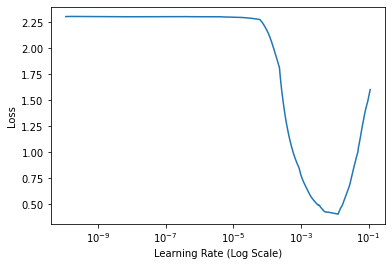

In [14]:
lrf.plot_loss()

تقریبا لرنینگ ریت بین 10^-4 و 10^-3 بهترین مقدار را دارد.